In [1]:
library(PerformanceAnalytics)
library(xts)
library(lubridate)

Warning message:
"package 'PerformanceAnalytics' was built under R version 4.3.3"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 4.3.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.3.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [2]:
fund <- read.csv("contrafund.csv")
head(fund,5)

,Date,ContraRet,Market.Return,Risk.Free
,<chr>,<dbl>,<dbl>,<dbl>
1,1/31/1980,0.024391,0.0631,0.0080
2,2/29/1980,-0.016874,-0.0033,0.0089
3,3/31/1980,-0.089431,-0.1169,0.0121
4,4/30/1980,0.017857,0.0523,0.0126
5,5/31/1980,0.078947,0.0607,0.0081


Change the date variable from character type to date type


In [3]:
fund$Date = mdy(fund$Date)
head(fund)

,Date,ContraRet,Market.Return,Risk.Free
,<date>,<dbl>,<dbl>,<dbl>
1,1980-01-31,0.024391,0.0631,0.0080
2,1980-02-29,-0.016874,-0.0033,0.0089
3,1980-03-31,-0.089431,-0.1169,0.0121
4,1980-04-30,0.017857,0.0523,0.0126
5,1980-05-31,0.078947,0.0607,0.0081
6,1980-06-30,0.011743,0.0367,0.0061


Check that the date column is ordered properly. (Better be safe to compute monthly returns.)


In [4]:
fund2 = fund[order(fund$Date),]
head(fund2)

,Date,ContraRet,Market.Return,Risk.Free
,<date>,<dbl>,<dbl>,<dbl>
1,1980-01-31,0.024391,0.0631,0.0080
2,1980-02-29,-0.016874,-0.0033,0.0089
3,1980-03-31,-0.089431,-0.1169,0.0121
4,1980-04-30,0.017857,0.0523,0.0126
5,1980-05-31,0.078947,0.0607,0.0081
6,1980-06-30,0.011743,0.0367,0.0061


 Create an xts dataset (extended time-series with date as the index)


In [5]:
fund3 = xts(fund[,-1],order.by = fund2[,1])
head(fund3)

           ContraRet Market.Return Risk.Free
1980-01-31  0.024391        0.0631    0.0080
1980-02-29 -0.016874       -0.0033    0.0089
1980-03-31 -0.089431       -0.1169    0.0121
1980-04-30  0.017857        0.0523    0.0126
1980-05-31  0.078947        0.0607    0.0081
1980-06-30  0.011743        0.0367    0.0061

 Compute the cumulative return for the 38 and a half years Jan 1980 to June 2018

geometric = True

use the geometric mean for calculating cumulative returns, which accounts for compounding effects

In [6]:
Return.cumulative(fund3,geometric = TRUE)

,ContraRet,Market.Return,Risk.Free
Cumulative Return,141.5677,69.29182,4.072008


Chart the cumulative returns of Contrafund.

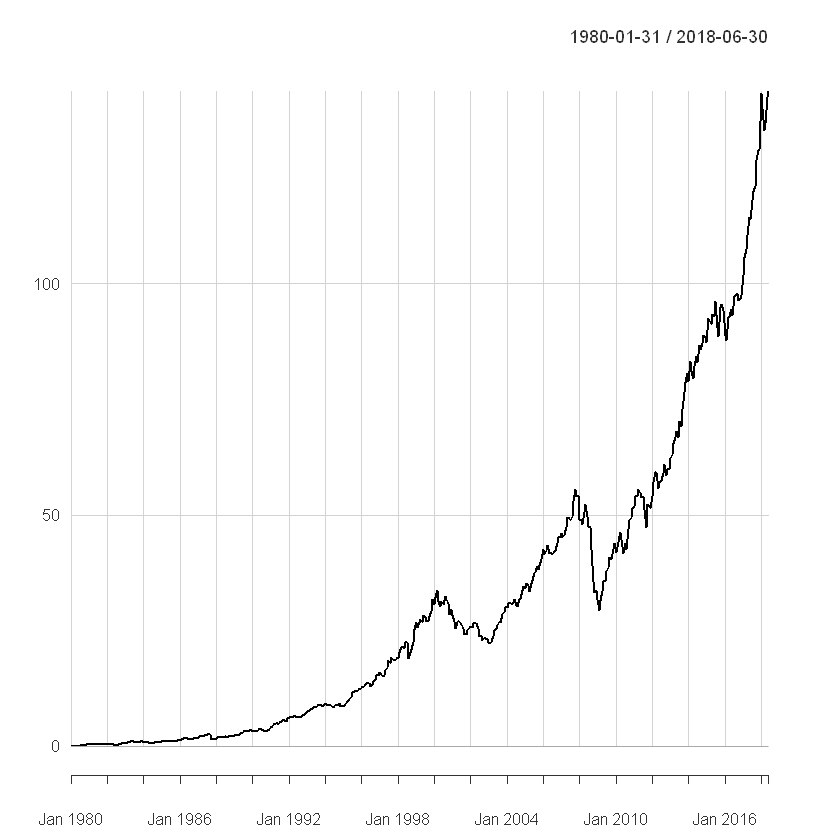

In [7]:
chart.CumReturns(fund3$ContraRet,wealth.index = FALSE,geometric = TRUE)

Chart the cumulative returns of Contrafund, the market and risk free rate in one chart


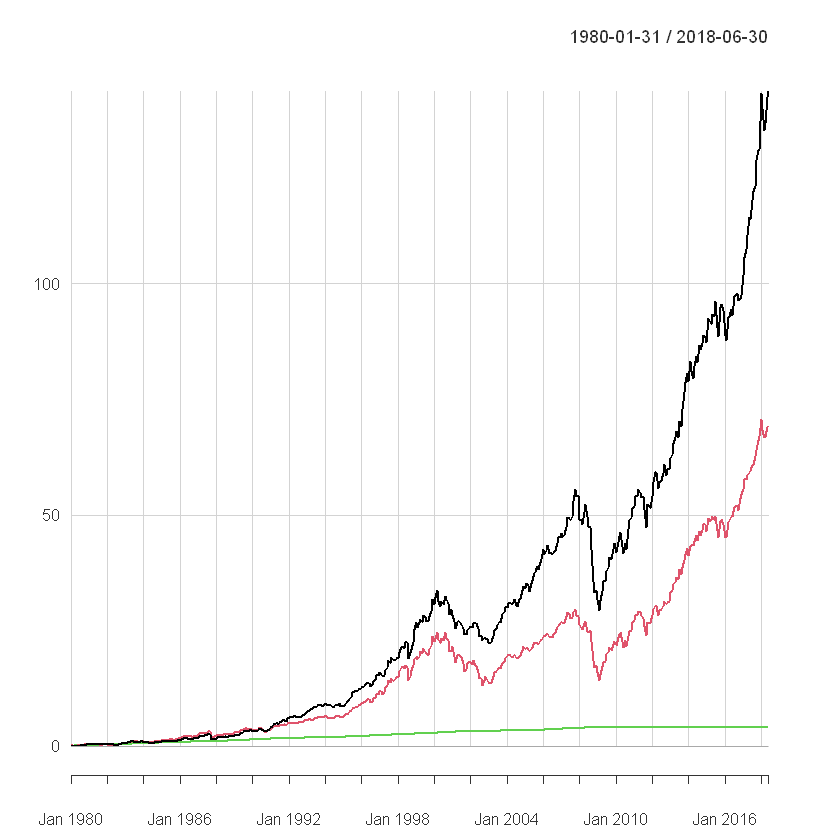

In [8]:
chart.CumReturns(fund3, wealth.index = FALSE, geometric = TRUE)

Compute the Sharpe Ratio of the Fund

measures the excess returns above the risk free rate


Output
StdDev: standard deviation of the funds return. Higher = more volitile
Sharpe: Risk adjust return

In [15]:
SharpeRatio(.1,.02)

ERROR: Error in checkData(R): The data cannot be converted into a time series.  If you are trying to pass in names from a data object with one column, you should use the form 'data[rows, columns, drop = FALSE]'.  Rownames should have standard date formats, such as '1985-03-15'. 


In [14]:
fund3

           ContraRet Market.Return Risk.Free
1980-01-31  0.024391        0.0631    0.0080
1980-02-29 -0.016874       -0.0033    0.0089
1980-03-31 -0.089431       -0.1169    0.0121
1980-04-30  0.017857        0.0523    0.0126
1980-05-31  0.078947        0.0607    0.0081
1980-06-30  0.011743        0.0367    0.0061
1980-07-31  0.103571        0.0702    0.0053
1980-08-31  0.008091        0.0244    0.0064
1980-09-30  0.036116        0.0294    0.0075
1980-10-31  0.019365        0.0201    0.0095
       ...                                  
2017-09-30  0.008487        0.0260    0.0009
2017-10-31  0.047277        0.0234    0.0009
2017-11-30  0.015914        0.0320    0.0008
2017-12-31  0.002905        0.0115    0.0009
2018-01-31  0.093204        0.0569    0.0011
2018-02-28 -0.022947       -0.0354    0.0011
2018-03-31 -0.035171       -0.0223    0.0012
2018-04-30  0.011990        0.0043    0.0014
2018-05-31  0.040553        0.0279    0.0014
2018-06-30  0.009323        0.0062    0.0014

In [ ]:
SharpeRatio(fund3$ContraRet,fund3$Risk.Free)

Compute the Treynor Ratio of the Contrafund

measures reward per unit of risk
performance of an investement relative to its systematic risk, as measured by beta
How much excess return they are receiving for each unit of risk taken


In [10]:
TreynorRatio(fund3$ContraRet,fund3$Market.Return,fund3$Risk.Free)

[1] 0.1005838

In [12]:
fund3

           ContraRet Market.Return Risk.Free
1980-01-31  0.024391        0.0631    0.0080
1980-02-29 -0.016874       -0.0033    0.0089
1980-03-31 -0.089431       -0.1169    0.0121
1980-04-30  0.017857        0.0523    0.0126
1980-05-31  0.078947        0.0607    0.0081
1980-06-30  0.011743        0.0367    0.0061
1980-07-31  0.103571        0.0702    0.0053
1980-08-31  0.008091        0.0244    0.0064
1980-09-30  0.036116        0.0294    0.0075
1980-10-31  0.019365        0.0201    0.0095
       ...                                  
2017-09-30  0.008487        0.0260    0.0009
2017-10-31  0.047277        0.0234    0.0009
2017-11-30  0.015914        0.0320    0.0008
2017-12-31  0.002905        0.0115    0.0009
2018-01-31  0.093204        0.0569    0.0011
2018-02-28 -0.022947       -0.0354    0.0011
2018-03-31 -0.035171       -0.0223    0.0012
2018-04-30  0.011990        0.0043    0.0014
2018-05-31  0.040553        0.0279    0.0014
2018-06-30  0.009323        0.0062    0.0014

Compute Jensen's Alpha

Measures abnormal returns that the portfolio earns after adjusting beta


In [13]:
fund4 <- transform(fund3, FundExcess = ContraRet-Risk.Free, MktExcess = Market.Return-Risk.Free)
head(fund4,5)

           ContraRet Market.Return Risk.Free ContraRet.1 Market.Return.1
1980-01-31  0.024391        0.0631    0.0080    0.016391          0.0551
1980-02-29 -0.016874       -0.0033    0.0089   -0.025774         -0.0122
1980-03-31 -0.089431       -0.1169    0.0121   -0.101531         -0.1290
1980-04-30  0.017857        0.0523    0.0126    0.005257          0.0397
1980-05-31  0.078947        0.0607    0.0081    0.070847          0.0526

In [15]:
basicmodel = lm(ContraRet.1 ~ Market.Return.1, data=fund4)
summary(basicmodel)


Call:
lm(formula = ContraRet.1 ~ Market.Return.1, data = fund4)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.087553 -0.009588  0.001373  0.010343  0.060880 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0021850  0.0008362   2.613  0.00927 ** 
Market.Return.1 0.9013625  0.0188580  47.797  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01777 on 460 degrees of freedom
Multiple R-squared:  0.8324,	Adjusted R-squared:  0.832 
F-statistic:  2285 on 1 and 460 DF,  p-value: < 2.2e-16


- Observe the value of the intercept: this is Jensen's Alpha
  + Answer: Jensen's Alpha = 0.002 = 0.2%

- Notice the value of the regression coefficient of Market.Return: this is Beta of the Contrafund
  + Answer: Beta of Contrafund = 0.90

To understand better, let's compute the Sharpe Ratio sort of 'by hand'. Insert code to compute Sharpe Ratio by hand.
We would need Std dev of portfolio returns and mean excess return.

Please note the differences. The true Sharpe Ratio uses the Standard Deviation of the Excess Returns, not just the fund returns. 


In [17]:
sharpe_by_hand = mean(fund4$ContraRet - fund4$Risk.Free)/ sd(fund4$ContraRet - fund4$Risk.Free)
sharpe_by_hand

[1] 0.1895916

In [19]:
sharpe_by_hand = mean(fund4$ContraRet-fund4$Risk.Free)/sd(fund4$ContraRet)
sharpe_by_hand
sharpe_by_hand1 = mean(fund4$ContraRet.1)/sd(fund4$ContraRet.1)
sharpe_by_hand1

sharpe_by_formula = SharpeRatio(fund4$ContraRet, fund4$Risk.Free, FUN = "StdDev")
sharpe_by_formula[1]

[1] 0.1901068

[1] 0.1895916

[1] 0.1901068

This is slightly lower than the value found above: 0.1901068.
 

0.1895916 is the correct value for the Sharpe Ratio, but 0.1901068 is also an accepted value for the Sharpe Ratio. The industry accepts both answers.

Compute the Annualize Sharpe Ratio

In [22]:
# Note that we do NOT use the Cumulative Return for fund4$ContraRet.1
# We only use the mean (or expected value) of the excess returns

# Annual Sharpe Ratio

sharpe_by_hand_annaul = mean(fund4$ContraRet-fund4$Risk.Free)*sqrt(12)/sd(fund4$ContraRet)
sharpe_by_hand_annaul

sharpe_by_formula_annual = SharpeRatio.annualized(fund4$ContraRet, fund4$Risk.Free,geometric = F)
sharpe_by_formula_annual[1]

[1] 0.6585493

[1] 0.6585493

Calculate the Treynor Ratio by Hand

In [25]:
beta = summary(basicmodel)$coef["Market.Return.1","Estimate"]

treynor_by_hand_annaul = 12*mean(fund4$`ContraRet.1`)/beta
treynor_by_hand_annaul

TreynorRatio(fund4$ContraRet, fund4$Market.Return,fund4$Risk.Free)

[1] 0.1094191

[1] 0.1005838

In [26]:
beta = summary(basicmodel)$coef["Market.Return.1","Estimate"]
treynor_by_hand_annual = 12*mean(fund4$ContraRet.1)/beta
treynor_by_hand_annual
TreynorRatio(fund4$ContraRet, fund4$Market.Return,fund4$Risk.Free)

[1] 0.1094191

[1] 0.1005838